In [19]:
#import libraries needed
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline

In [20]:
# ENter Code and downlaod data from yfinance
# This model is built to download data using any Ticker of choice
# On runnin the program, a prompt 'Code please' will emerge. Input Ticker and click enter.
stocks = input('Code please')
data = yf.download(stocks, start = '2008-01-01', end = '2023-01-01', auto_adjust=True)
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2008-01-02,848.700012,857.799988,846.400024,857.000000,130
2008-01-03,863.000000,865.500000,856.299988,866.400024,181
2008-01-04,861.400024,865.500000,860.200012,863.099976,28
2008-01-07,860.900024,860.900024,857.400024,859.599976,4
2008-01-08,861.599976,879.400024,861.599976,878.000000,21


In [21]:
# check number of rows and columns
data.shape


(3774, 5)

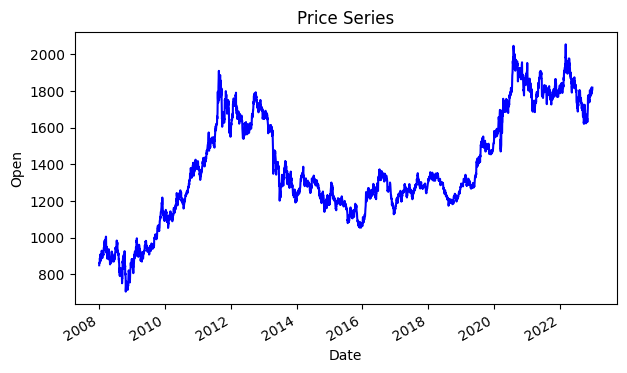

In [37]:
# run exploratory analysis on the 'Close' column agaisnt Date
data.Open.plot(figsize=(7, 4), color='b')
plt.ylabel('Open')
plt.title('Price Series')
plt.show();

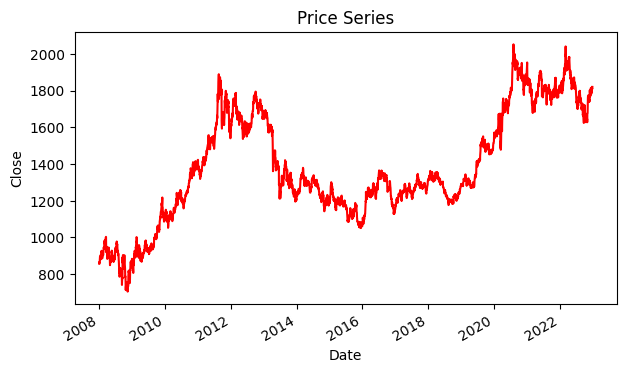

In [36]:
# # run exploratory analysis on the 'Close' column against Date
data.Close.plot(figsize=(7, 4), color='r')
plt.ylabel('Close')
plt.title('Price Series')
plt.show();

<Axes: >

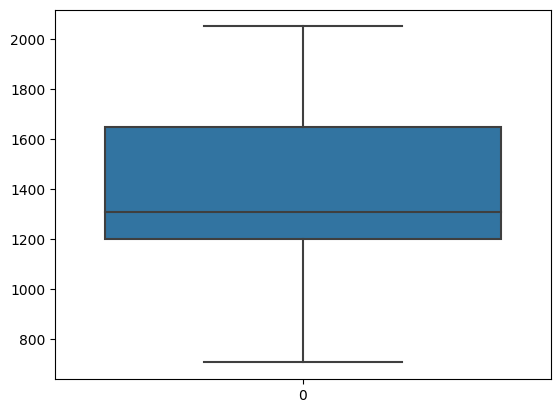

In [24]:
sns.boxplot(data['Close'])

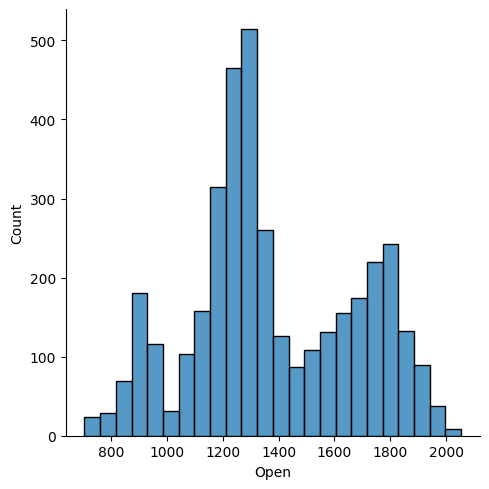

In [25]:
sns.displot(data['Open']);

In [26]:
# Conclusion
# Data is not linear

In [27]:
# Divide data for training and testing
x = data.drop('Close', axis=1)
y = data[['Close']]

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(3019, 4)
(3019, 1)
(755, 4)
(755, 1)


In [30]:
#fit the model and run predictions
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
prediction1 = lr.predict(x_test)
prediction1

array([[1624.52846093],
       [1150.21288976],
       [1636.57677785],
       [1781.23250636],
       [1294.06565414],
       [1728.92378241],
       [1336.83900702],
       [1146.80627343],
       [ 870.84643641],
       [1204.97010945],
       [1878.14796886],
       [1794.59618685],
       [1604.50743015],
       [1339.9191753 ],
       [1756.6596191 ],
       [1687.94459014],
       [1265.69851287],
       [ 732.51132814],
       [1709.58373423],
       [1774.22609791],
       [1244.94710015],
       [1937.17175929],
       [1381.91124701],
       [1862.80972858],
       [1059.62649554],
       [1233.8352856 ],
       [1588.36151907],
       [1666.99399738],
       [1890.86109708],
       [1836.49801295],
       [1821.97113606],
       [1082.45150389],
       [1296.03850016],
       [ 750.99104529],
       [1786.77212713],
       [1642.6026786 ],
       [ 902.62520332],
       [1174.56059929],
       [1313.87367804],
       [1928.12030479],
       [1209.37307133],
       [1764.930

In [31]:
#check how perfect your prediction is
from sklearn.metrics import mean_squared_error, r2_score

def calculate_perfections(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2_scores = r2_score(y_test, y_pred)

    print('Mean score error:', mse)
    print('Root of mean square error:', rmse)
    print('Perfection:', r2_scores)

calculate_perfections(y_test, prediction1)
                          

Mean score error: 26.217881789374907
Root of mean square error: 5.120340007204103
Perfection: 0.9996990292950205


In [32]:
# to eliminate less important data and to prevent overfitting and underfitting
from sklearn.linear_model import Lasso, Ridge

In [33]:
la = Lasso().fit(x_train, y_train)
ri = Ridge().fit(x_train, y_train)

la_prediction = la.predict(x_test)
ri_prediction = ri.predict(x_test)

calculate_perfections(y_test, la_prediction)
calculate_perfections(y_test, ri_prediction)

Mean score error: 53.11960316017141
Root of mean square error: 7.288319638995769
Perfection: 0.9993902083875508
Mean score error: 26.217897055382544
Root of mean square error: 5.120341497925948
Perfection: 0.9996990291197729


C:\Users\mikep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.506e+04, tolerance: 2.626e+04
  model = cd_fast.enet_coordinate_descent(


In [34]:
#save your model
import joblib

In [35]:
joblib.dump(ri, 'model.pkl')
ridge_from_joblib = model = joblib.load('model.pkl')